In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/상품개발기획MD.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...,데이터 사이언스 데이터 엔지니어링 데이터 분석 도구 및 프로그래밍 언어 등 데...
1,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...,신입 혹은 1년 이상의 교육 상품 기획 경력 경영 및 경제학이 전공이신 분 금융 ...
2,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...,신입 혹은 1년 이상의 교육 상품 기획 경력 프로젝트를 주도적으로 기획실행해본 경...
3,지속적인 시장 조사와 고객 피드백 유저 리서치를 통해 새로운 기회를 찾아내고 ...,AI 기술 및 관련 산업 트렌드에 대한 전반적인 이해와 관심이 있으신 분 소프트웨...
4,마케팅 전략 수립 마케팅 기획 마케팅 집행,성장에 대한 열정이 있으신 분 전략적으로 사고하고 빠르게 실행하실 수 있는 분 주...
...,...,...
206,SNS 채널 운영 및 데이터 분석SNS 포스팅 기획 및 원고 작성체험단 진행 및 관...,학력 초대졸이상경력 25년포트폴리오 제출디자인툴 사용 가능자통계 분석 능숙자 문서...
207,Go To Market 관점 Product Planning 부터 판매Channel전...,필요역량Experienced in team management as a market...
208,브랜드 진단 및 전략 방향성 수립 브랜드 네임 슬로건 및 스토리 개발 브랜드 체계...,사업의 성장에 브랜드가 미치는 영향에 대한 이해가 있는 분전략과 실행 간 끊김 없는...
209,함께할 제휴 파트너스를 발굴해요숙박 티켓 FB 등 경험 상품을 가진 파트너 자사몰...,숙박 레저 등 카테고리에 대한 관련업계의 네트워크를 가지고 있으신 분 온라인 커머...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...
1,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...
2,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...
3,지속적인 시장 조사와 고객 피드백 유저 리서치를 통해 새로운 기회를 찾아내고 ...
4,마케팅 전략 수립 마케팅 기획 마케팅 집행
...,...
206,SNS 채널 운영 및 데이터 분석SNS 포스팅 기획 및 원고 작성체험단 진행 및 관...
207,Go To Market 관점 Product Planning 부터 판매Channel전...
208,브랜드 진단 및 전략 방향성 수립 브랜드 네임 슬로건 및 스토리 개발 브랜드 체계...
209,함께할 제휴 파트너스를 발굴해요숙박 티켓 FB 등 경험 상품을 가진 파트너 자사몰...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/상품개발기획MD(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 사이클 주관 트렌드 분석  시장 리서치를 바탕으로 신규 교육 주제 선정 커리큘럼 기획  강사진 섭외 상세페이지  마케팅 크리에이티브 제작 고객 획득과 고객 참여도를 높이기 위한 마케터와 협업 온오프라인 교육 운영  고객 관리 및 니즈 분석\n PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 사이클 주관 트렌드 분석  시장 리서치를 바탕으로 신규 교육 주제 선정 커리큘럼 기획  강사진 섭외 상세페이지  마케팅 크리에이티브 제작 고객 획득과 고객 참여도를 높이기 위한 마케터와 협업 온오프라인 교육 운영  고객 관리 및 니즈 분석\n PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 사이클 주관 트렌드 분석  시장 리서치를 바탕으로 신규 교육 주제 선정 커리큘럼 기획  강사진 섭외 상세페이지  마케팅 크리에이티브 제작 고객 획득과 고객 참여도를 높이기 위한 마케터와 협업 온오프라인 교육 운영  고객 관리 및 니즈 분석\n   지속적인 시장 조사와 고객 피드백 유저 리서치를 통해 새로운 기회를 찾아내고 제품에 반영합니다  VESSL AI의 비즈니스 목표와 정렬된 제품 전략을 수립하고 로드맵을 세울 수 있으며 고객에게 가치가 전달되는 과정까지 실행하고 추진합니다  고객사와의 커뮤니케이션을 통해 지속적으로 제품에 대한 요구사항과 피드백을 수집하고 개발과 개선이 필요한 사항을 구체적으로 기획하여 중요도에 따라 수행합니다  개발 디자인 ML 연구자로 구성된 제품 조직과 함께 제품을 개선하는 과정을 이끌어 나갑니다\n 마케팅 전략 수립 마케팅 기획 마케팅 집행\n  Product 팀 목표와 전략 수립 및 실행 리드 마케팅 예산의 효율적 배분 Paid media 최적화 전략 수립 및 운영을 통해 매출 성장 견인  데이터 분석을 통한 다양한 AB Test 가설 수립 및 효율을 개선 트래킹 솔루션을 활용한 데이터 기반 분석 

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '과',
 '성장',
 '사람',
 '교육',
 '기획',
 '기획',
 '마케팅',
 '제품',
 '사이클',
 '주관',
 '트렌드',
 '분석',
 '시장',
 '리서치',
 '바탕',
 '신규',
 '교육',
 '주제',
 '선정',
 '커리큘럼',
 '기획',
 '강',
 '사진',
 '섭외',
 '상세',
 '페이지',
 '마케팅',
 '크리에이티브',
 '제작',
 '고객',
 '획득',
 '고객',
 '참여',
 '위',
 '마케터',
 '협업',
 '오프라인',
 '교육',
 '운영',
 '고객',
 '관리',
 '및',
 '분석',
 '과',
 '성장',
 '사람',
 '교육',
 '기획',
 '기획',
 '마케팅',
 '제품',
 '사이클',
 '주관',
 '트렌드',
 '분석',
 '시장',
 '리서치',
 '바탕',
 '신규',
 '교육',
 '주제',
 '선정',
 '커리큘럼',
 '기획',
 '강',
 '사진',
 '섭외',
 '상세',
 '페이지',
 '마케팅',
 '크리에이티브',
 '제작',
 '고객',
 '획득',
 '고객',
 '참여',
 '위',
 '마케터',
 '협업',
 '오프라인',
 '교육',
 '운영',
 '고객',
 '관리',
 '및',
 '분석',
 '과',
 '성장',
 '사람',
 '교육',
 '기획',
 '기획',
 '마케팅',
 '제품',
 '사이클',
 '주관',
 '트렌드',
 '분석',
 '시장',
 '리서치',
 '바탕',
 '신규',
 '교육',
 '주제',
 '선정',
 '커리큘럼',
 '기획',
 '강',
 '사진',
 '섭외',
 '상세',
 '페이지',
 '마케팅',
 '크리에이티브',
 '제작',
 '고객',
 '획득',
 '고객',
 '참여',
 '위',
 '마케터',
 '협업',
 '오프라인',
 '교육',
 '운영',
 '고객',
 '관리',
 '및',
 '분석',
 '지속',
 '시장',
 '조사',
 '고객',
 '피드백',
 '유저',
 '리서치',

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

7916
879


FreqDist({'및': 601, '관리': 391, '기획': 305, '상품': 197, '운영': 169, '분석': 152, '채널': 128, '브랜드': 119, '전략': 118, '마케팅': 112, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '과',
 '성장',
 '사람',
 '교육',
 '기획',
 '기획',
 '마케팅',
 '제품',
 '사이클',
 '주관',
 '트렌드',
 '분석',
 '시장',
 '리서치',
 '바탕',
 '교육',
 '주제',
 '선정',
 '커리큘럼',
 '기획',
 '강',
 '사진',
 '섭외',
 '상세',
 '페이지',
 '마케팅',
 '크리에이티브',
 '고객',
 '획득',
 '고객',
 '참여',
 '마케터',
 '협업',
 '오프라인',
 '교육',
 '운영',
 '고객',
 '관리',
 '분석',
 '과',
 '성장',
 '사람',
 '교육',
 '기획',
 '기획',
 '마케팅',
 '제품',
 '사이클',
 '주관',
 '트렌드',
 '분석',
 '시장',
 '리서치',
 '바탕',
 '교육',
 '주제',
 '선정',
 '커리큘럼',
 '기획',
 '강',
 '사진',
 '섭외',
 '상세',
 '페이지',
 '마케팅',
 '크리에이티브',
 '고객',
 '획득',
 '고객',
 '참여',
 '마케터',
 '협업',
 '오프라인',
 '교육',
 '운영',
 '고객',
 '관리',
 '분석',
 '과',
 '성장',
 '사람',
 '교육',
 '기획',
 '기획',
 '마케팅',
 '제품',
 '사이클',
 '주관',
 '트렌드',
 '분석',
 '시장',
 '리서치',
 '바탕',
 '교육',
 '주제',
 '선정',
 '커리큘럼',
 '기획',
 '강',
 '사진',
 '섭외',
 '상세',
 '페이지',
 '마케팅',
 '크리에이티브',
 '고객',
 '획득',
 '고객',
 '참여',
 '마케터',
 '협업',
 '오프라인',
 '교육',
 '운영',
 '고객',
 '관리',
 '분석',
 '지속',
 '시장',
 '조사',
 '고객',
 '피드백',
 '유저',
 '리서치',
 '통해',
 '기회',
 '제품',
 '반영',
 '의',
 '비즈니스',
 '목표',
 '정렬',
 '제품',
 '전략',
 '로드맵',
 '고객'

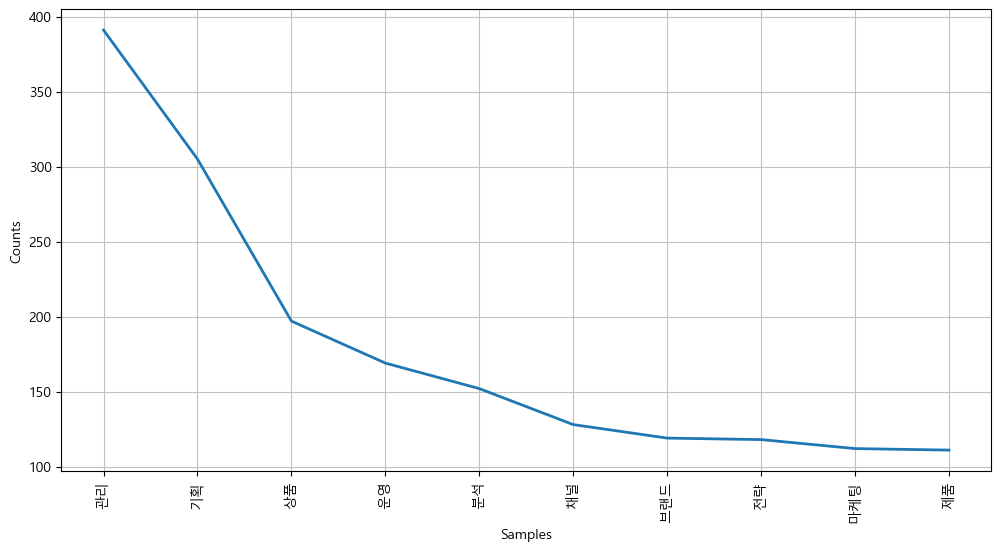

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

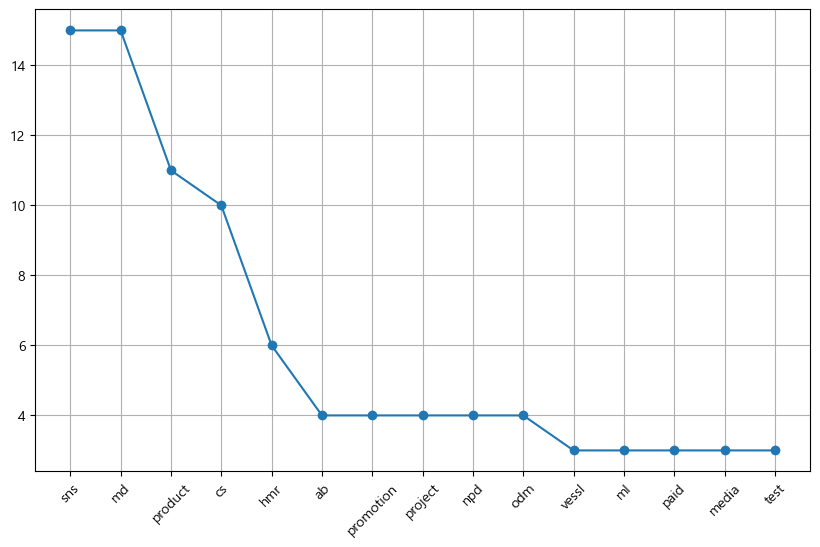

In [11]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)